In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [24]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')

In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df=df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df['Species']=le.fit_transform(df['Species'])

In [31]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
5,5.4,3.9,1.7,0.4,0
22,4.6,3.6,1.0,0.2,0
114,5.8,2.8,5.1,2.4,2
134,6.1,2.6,5.6,1.4,2


In [32]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [33]:
df['Species'].shape

(150,)

In [34]:
df=df[df['Species'] != 0][['SepalWidthCm', 'PetalLengthCm', 'Species']]

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

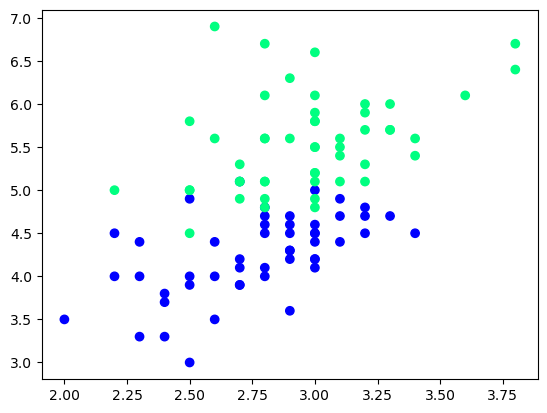

In [36]:
plt.scatter(x=df['SepalWidthCm'],y= df['PetalLengthCm'], c=df['Species'], cmap='winter')

In [37]:
df=df.sample(100)
df_train=df.iloc[:60, :].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [38]:
X_test=df_val.iloc[:, 0:2].values
y_test=df_val.iloc[:,-1].values

# CASE1- BAGGING

In [39]:
df_bag=df_train.sample(8, replace=True)

In [40]:
X=df_bag.iloc[:, 0:2]
y=df_bag.iloc[:, -1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
93,2.3,3.3,1
65,3.1,4.4,1
100,3.3,6.0,2
59,2.7,3.9,1
59,2.7,3.9,1
63,2.9,4.7,1
59,2.7,3.9,1


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [48]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

In [49]:
dt_bag1=DecisionTreeClassifier()

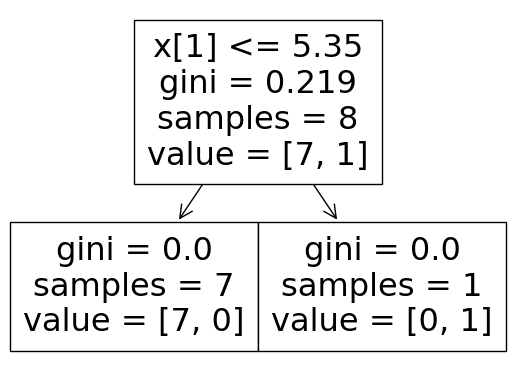

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


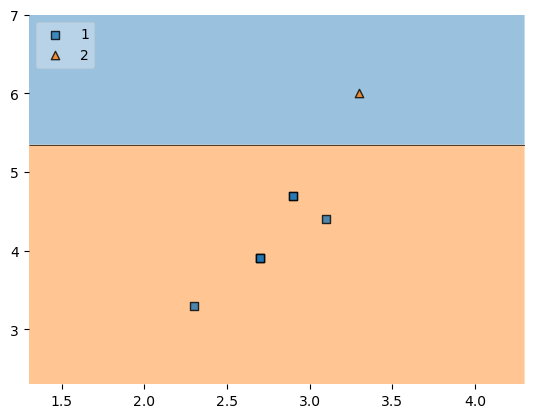

In [50]:
evaluate(dt_bag1, X, y)

In [52]:
df_bag=df_train.sample(8, replace=8)
X=df_bag.iloc[:, 0:2]
y=df_bag.iloc[:, -1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
51,3.2,4.5,1
100,3.3,6.0,2
100,3.3,6.0,2
50,3.2,4.7,1
83,2.7,5.1,1
65,3.1,4.4,1
59,2.7,3.9,1
59,2.7,3.9,1


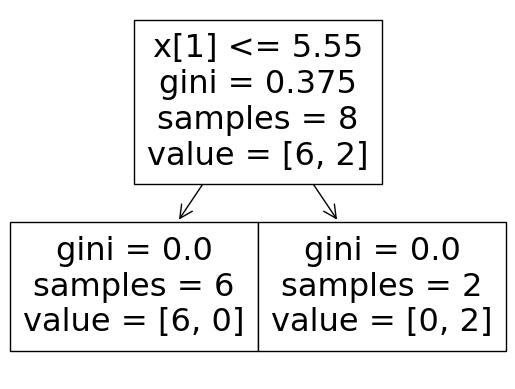

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


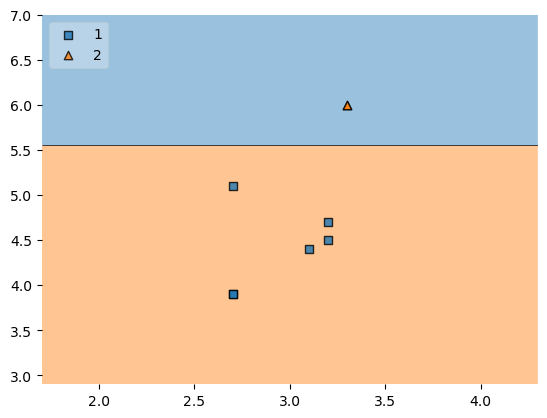

In [53]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [54]:
# data for tree 1

df_bag=df_train.sample(8, replace=True)

X=df_bag.iloc[:, 0:2]
y=df_bag.iloc[:, -1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
112,3.0,5.5,2
83,2.7,5.1,1
59,2.7,3.9,1
81,2.4,3.7,1
93,2.3,3.3,1
51,3.2,4.5,1
65,3.1,4.4,1
93,2.3,3.3,1


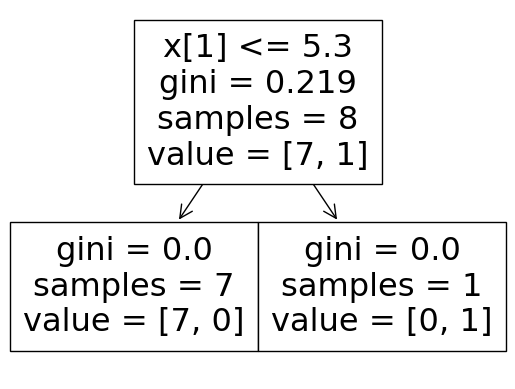

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


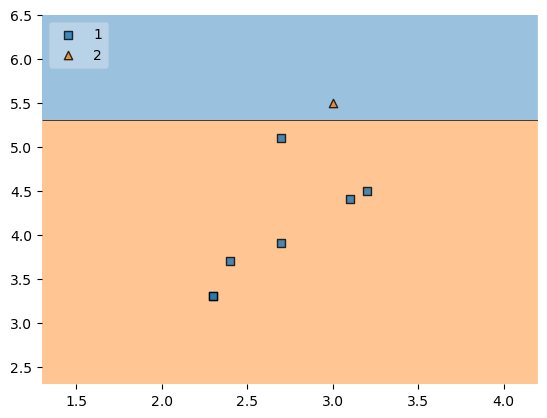

In [55]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3, X, y)


# Predict

In [56]:
df_test

,SepalWidthCm,PetalLengthCm,Species
99,2.8,4.1,1
74,2.9,4.3,1
142,2.7,5.1,2
110,3.2,5.1,2
113,2.5,5.0,2


In [59]:
y.shape

(8,)

In [73]:
print('predictor 1:', dt_bag1.predict(np.array([2.2, 5.0]).reshape(1,2)))
print('predictor 1:', dt_bag2.predict(np.array([2.2, 5.0]).reshape(1,2)))
print('predictor 1:', dt_bag3.predict(np.array([2.2, 5.0]).reshape(1,2)))

predictor 1: [1]
predictor 1: [1]
predictor 1: [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [74]:
df_train

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
83,2.7,5.1,1
93,2.3,3.3,1
59,2.7,3.9,1
112,3.0,5.5,2
81,2.4,3.7,1
63,2.9,4.7,1
51,3.2,4.5,1
65,3.1,4.4,1
50,3.2,4.7,1


In [75]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
63,2.9,4.7,1
81,2.4,3.7,1
59,2.7,3.9,1
51,3.2,4.5,1
100,3.3,6.0,2
65,3.1,4.4,1
93,2.3,3.3,1


# Random Subspaces

In [76]:
df1=pd.read_csv('/kaggle/input/iris/Iris.csv')
df1=df1.sample(10)

In [77]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
133,134,6.3,2.8,5.1,1.5,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
29,30,4.7,3.2,1.6,0.2,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa


In [83]:
df1.sample(2, replace=True, axis=1) # 2 random cols i.e colmn sampling

,PetalWidthCm,Species
78,1.5,Iris-versicolor
67,1.0,Iris-versicolor
53,1.3,Iris-versicolor
18,0.3,Iris-setosa
133,1.5,Iris-virginica
138,1.8,Iris-virginica
29,0.2,Iris-setosa
91,1.4,Iris-versicolor
48,0.2,Iris-setosa
30,0.2,Iris-setosa


In [84]:
df1.sample(2, replace=True, axis=0) # 2 random rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor


In [86]:
df1.sample(8, replace=True) # 8 random rows i.e. row sampling

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa


In [87]:
df1.sample(8, replace=True).sample(2, replace=True, axis=1) # 8 random rows me se 2 random cols

,PetalLengthCm,PetalWidthCm
78,4.5,1.5
29,1.6,0.2
67,4.1,1.0
48,1.5,0.2
67,4.1,1.0
53,4.0,1.3
78,4.5,1.5
138,4.8,1.8
